# **MEMORIA**


    He cargado el conjunto de datos original, bayer_df, que contiene información sobre productos y su presencia en diferentes países.

    Creamos un DataFrame llamado countries usando pd.get_dummies para convertir la columna de países en una matriz de 0 y 1 que representa la presencia de productos en cada país.

    Filtramos los países que tienen más de 20 productos usando un enfoque de suma.
    
    Intentos fallidos al calcular la correlación entre productos y la presencia en estos países filtrados. En este punto, se produjeron errores relacionados con la indexación y los nombres de los países en los DataFrames.

A partir de esto, me replanteo mi existencia entera y decido centrarme en otros objetivos: 

1. **Identificar productos líderes en cada país**: Podría analizar los países filtrados y determinar qué productos tienen la mayor presencia en cada uno de ellos.

2. **Análisis de productos en tendencia**: Puedo examinar los productos que están en tendencia o que muestran un aumento en la presencia en ciertos países.

3. **Segmentación de productos por categoría o marca**: agruparía los productos en función de su categoría o marca y analizar cómo se distribuyen en los países.

4. **Análisis de correlación entre países**: En lugar de la correlación entre productos y países, podríamos explorar cómo se relacionan los países entre sí en términos de la presencia de productos.

5. **Predicción de la expansión de productos**: Si tienes datos históricos, podríamos utilizar técnicas de predicción para anticipar la expansión de ciertos productos en diferentes países.



In [2]:
import pandas as pd
import numpy as np

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
bayer_df=pd.read_csv('/Users/julyetsi/Data Science VSCode/Carpeta_trabajo/eda_notebooks /bayerdata.csv')
bayer_df.head(3)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Dossier Type (Relationships.Formulation.Formulation Attributes),Lifecycle Phase (Relationships.Formulation.Title Block),Lifecycle Phase,Triangulated (Page Two),Marketed Countries (Page Three),Country lead cluster,...,Volume 2,Class of goods,Primary Pack Type (Page Three).1,FG Pack Size (Page Three).1,FG Pack Size UoM (Page Three).1,Roman Number,Low performer,Samples,Galenical form.1,Combipack (Page Three)
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Pharma,Active,Active,Yes,Bolivia [BO];Uruguay [UY],Other Conosur,...,197,SG (Sales Goods),Tube Rigid,10.0,Piece [PCE],IX,NaN,NO,Solid|Tablet|Effervescent,No
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Pharma,Active,Active,No,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,...,251,SG (Sales Goods),Tube Rigid,10.0,Piece [PCE],IX,NaN,NO,Solid|Tablet|Effervescent,No
2,10055778,BEROCCA PLUS laq x30 CL,1600119,Nutritionals,Pharma,Active,Active,Yes,Chile [CL],Chile,...,5,SG (Sales Goods),Blister,30.0,Piece [PCE],IX,NaN,NO,Solid|Tablet|Film-coated,No


## *Quiero coger la columna de las marketed countries y recuperar los países que contiene para darle una columna a cada uno.*
#### Los países me mostrarán con ceros y unos si en ese país se está comercializando un fármaco o no.

In [5]:
countries=bayer_df['Marketed Countries (Page Three)'].str.get_dummies(";")
countries.head(20)

,Antigua and Barbuda [AG],Argentina [AR],Aruba [AW],Bahamas [BS],Barbados [BB],Belize [BZ],Bermuda [BM],Bolivia [BO],Brazil [BR],Cayman Islands [KY],...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
bayer_df.head(2)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Dossier Type (Relationships.Formulation.Formulation Attributes),Lifecycle Phase (Relationships.Formulation.Title Block),Lifecycle Phase,Triangulated (Page Two),Marketed Countries (Page Three),Country lead cluster,...,Volume 2,Class of goods,Primary Pack Type (Page Three).1,FG Pack Size (Page Three).1,FG Pack Size UoM (Page Three).1,Roman Number,Low performer,Samples,Galenical form.1,Combipack (Page Three)
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Pharma,Active,Active,Yes,Bolivia [BO];Uruguay [UY],Other Conosur,...,197,SG (Sales Goods),Tube Rigid,10.0,Piece [PCE],IX,NaN,NO,Solid|Tablet|Effervescent,No
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Pharma,Active,Active,No,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,...,251,SG (Sales Goods),Tube Rigid,10.0,Piece [PCE],IX,NaN,NO,Solid|Tablet|Effervescent,No


In [7]:
bayer_df.shape

(657, 34)

In [8]:
bayer_df.columns

Index(['Number', 'Material Description (Name)',
       'Number (Relationships.Formulation.Title Block)',
       'SBU Category (Relationships.Formulation.Formulation Attributes)',
       'Dossier Type (Relationships.Formulation.Formulation Attributes)',
       'Lifecycle Phase (Relationships.Formulation.Title Block)',
       'Lifecycle Phase', 'Triangulated (Page Two)',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Region',
       'Primary Pack Type (Page Three)', 'FG Pack Size (Page Three)',
       'FG Pack Size UoM (Page Three)', 'Created on (Page Two)',
       'Year created', 'Repack', 'SBU Category', 'Brand', 'UI',
       'UI Description', 'Galenical form', 'Volume 4', 'Volume 3', 'Volume 2',
       'Class of goods', 'Primary Pack Type (Page Three).1',
       'FG Pack Size (Page Three).1', 'FG Pack Size UoM (Page Three).1',
       'Roman Number', 'Low performer', 'Samples', 'Galenical form.1',
       'Combipack (Page Three)'],
      dtype='object')

In [9]:
bayer_df.drop(columns=['Dossier Type (Relationships.Formulation.Formulation Attributes)',\
    'Lifecycle Phase (Relationships.Formulation.Title Block)', 'Lifecycle Phase', 'Triangulated (Page Two)',\
        'Class of goods','Samples','Roman Number', 'Combipack (Page Three)'], inplace=True)

In [10]:
bayer_df.columns

Index(['Number', 'Material Description (Name)',
       'Number (Relationships.Formulation.Title Block)',
       'SBU Category (Relationships.Formulation.Formulation Attributes)',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Region',
       'Primary Pack Type (Page Three)', 'FG Pack Size (Page Three)',
       'FG Pack Size UoM (Page Three)', 'Created on (Page Two)',
       'Year created', 'Repack', 'SBU Category', 'Brand', 'UI',
       'UI Description', 'Galenical form', 'Volume 4', 'Volume 3', 'Volume 2',
       'Primary Pack Type (Page Three).1', 'FG Pack Size (Page Three).1',
       'FG Pack Size UoM (Page Three).1', 'Low performer', 'Galenical form.1'],
      dtype='object')

In [11]:
#comentado para que no me de error 
#bayer_df.drop(columns=['Region', 'Year created', 'Low performer', 'Repack', 'Created on (Page Two)'], inplace=True)

In [12]:
bayer_df.head(2)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Primary Pack Type (Page Three).1,FG Pack Size (Page Three).1,FG Pack Size UoM (Page Three).1,Low performer,Galenical form.1
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,REDOXON Orange 1000 mg Effervescent Tablet,Solid|Tablet|Effervescent,85,164,197,Tube Rigid,10.0,Piece [PCE],NaN,Solid|Tablet|Effervescent
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,LATAM,Tube Rigid,10.0,Piece [PCE],...,REDOXON 2000 mg Effervescent Tablet,Solid|Tablet|Effervescent,184,246,251,Tube Rigid,10.0,Piece [PCE],NaN,Solid|Tablet|Effervescent


In [13]:
#bayer_df.drop(columns=['Galenical form.1'],inplace=True)
bayer_df.head(2)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Primary Pack Type (Page Three).1,FG Pack Size (Page Three).1,FG Pack Size UoM (Page Three).1,Low performer,Galenical form.1
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,REDOXON Orange 1000 mg Effervescent Tablet,Solid|Tablet|Effervescent,85,164,197,Tube Rigid,10.0,Piece [PCE],NaN,Solid|Tablet|Effervescent
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,LATAM,Tube Rigid,10.0,Piece [PCE],...,REDOXON 2000 mg Effervescent Tablet,Solid|Tablet|Effervescent,184,246,251,Tube Rigid,10.0,Piece [PCE],NaN,Solid|Tablet|Effervescent


In [14]:
bayer_df.columns

Index(['Number', 'Material Description (Name)',
       'Number (Relationships.Formulation.Title Block)',
       'SBU Category (Relationships.Formulation.Formulation Attributes)',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Region',
       'Primary Pack Type (Page Three)', 'FG Pack Size (Page Three)',
       'FG Pack Size UoM (Page Three)', 'Created on (Page Two)',
       'Year created', 'Repack', 'SBU Category', 'Brand', 'UI',
       'UI Description', 'Galenical form', 'Volume 4', 'Volume 3', 'Volume 2',
       'Primary Pack Type (Page Three).1', 'FG Pack Size (Page Three).1',
       'FG Pack Size UoM (Page Three).1', 'Low performer', 'Galenical form.1'],
      dtype='object')

In [15]:
bayer_df.shape

(657, 26)

In [16]:
bayer_df.describe()

,Number,Number (Relationships.Formulation.Title Block),FG Pack Size (Page Three),Year created,UI,FG Pack Size (Page Three).1
count,6.570000e+02,6.570000e+02,657.000000,569.000000,6.570000e+02,657.000000
mean,7.925405e+07,1.606115e+06,51.327245,2018.393673,1.606083e+06,51.327245
std,2.247976e+07,6.167990e+03,119.034372,2.966900,6.159247e+03,119.034372
min,4.410797e+06,1.600001e+06,1.000000,2010.000000,1.600001e+06,1.000000
25%,8.453937e+07,1.600133e+06,10.000000,2017.000000,1.600132e+06,10.000000
50%,8.690624e+07,1.601238e+06,24.000000,2019.000000,1.601236e+06,24.000000
75%,8.769056e+07,1.611945e+06,60.000000,2020.000000,1.611945e+06,60.000000
max,8.979245e+07,1.615412e+06,2400.000000,2023.000000,1.615412e+06,2400.000000


Al ser identificadores, y poco más no me es posible sacar mucha info de este data set de buenas a primeras simplemente con el .describe()

In [17]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
x= bayer_df['Brand']
y= countries

In [19]:
bayer_df['Brand'].value_counts()

Brand
REDOXON              81
ASPIRIN PAIN         58
BEPANTHEN            43
CANESTEN GYNE        40
ALKA-SELTZER         38
BEPANTHOL            36
TABCIN               36
MEXSANA              28
ACTRON               26
APRONAX              24
SUPRADYN             22
CANESTEN DERM        22
ASPIRIN CARDIO       20
FLANAX               18
BEROCCA              17
ALEVE                17
AFRIN                15
DESENFRIOL           13
CLARITIN             11
ALKA-SELTZER PLUS    10
ACID MANTLE           8
ASPIRIN PLUS C        7
ELEVIT                6
NATELE                6
TALCID                6
CELESTAMINE           5
CLARITIN-D            4
FOCUS                 4
HYDRALIN              3
MERTHIOLATE           3
SARIDON               3
BECOZYM               3
RENNIE                2
BENEXOL               2
IBEROGAST             2
CITRACAL              2
AKTREN                2
BAYCUTEN              2
CORILIN               2
BAYKID                2
PROTOVIT              1
CAL-C-VITA

In [20]:
bayer_df['UI Description'].value_counts()

UI Description
BEPANTHEN 5 % Ointment                                   32
ALKA SELTZER Effervescent Tablet                         23
REDOXON Triple Action Effervescent Tablet                22
ASPIRIN PAIN 500 mg Plain Tablet                         15
FLANAX 550 mg Film-coated tablet (LAM)                   14
                                                         ..
AFRIN Paediatric Decongestant 0.025% Nasal Spray          1
CANESTEN GYNE CanesOral 150 mg Hard Gelatine Capsules     1
LASONIL 10% Gel                                           1
ACTRON Mujer 400 mg Soft Gelatine Capsules                1
DESENFRIOL Coated tablet                                  1
Name: count, Length: 174, dtype: int64

In [21]:
bayer_df['Material Description (Name)'].value_counts()

Material Description (Name)
Redoxon Infantil 100mg TACH BT 100 CEA      3
Alka-Seltzer 750mg TSCH BT 36 CEA           3
REDOXON INFANTIL TACH Mixed flavour MX      3
REDOX INF 100TAB M-SAB NF MX                3
AlkaSeltzer60T AlkaExtreme 4Sach Free CO    2
                                           ..
REDOXON DROS 20% FCO X 20ML EC              1
ACTRON PEDIAT 4% BBL x100 AR/BO/PY          1
ACTRONRA cap x10 CL                         1
ELEVIT 30 TAB 2 PACK CLUBES MX              1
Bepantol Baby WIPE POU 6x48  BR             1
Name: count, Length: 641, dtype: int64

Originalmente sí que han habido valores nulos, pero se encontraban en tres de las columnas que he borrado.

In [22]:
bayer_df.isnull().sum()

Number                                                               0
Material Description (Name)                                          0
Number (Relationships.Formulation.Title Block)                       0
SBU Category (Relationships.Formulation.Formulation Attributes)      0
Marketed Countries (Page Three)                                      0
Country lead cluster                                                 0
Region                                                               0
Primary Pack Type (Page Three)                                       0
FG Pack Size (Page Three)                                            0
FG Pack Size UoM (Page Three)                                        0
Created on (Page Two)                                               88
Year created                                                        88
Repack                                                               0
SBU Category                                                         0
Brand 

Continuamos, esta vez limpiando los caracteresque sobren con .replace y conexpresiones regulares

In [23]:
import re

# de nuevoremover comas y espacios en las columnas
bayer_df['Volume 2'] = bayer_df['Volume 2'].str.replace(',', '').str.strip()
bayer_df['Volume 3'] = bayer_df['Volume 3'].str.replace(',', '').str.strip()
bayer_df['Volume 4'] = bayer_df['Volume 4'].str.replace(',', '').str.strip()

#expresiones regulares para extraer los números entre paréntesis
bayer_df['Volume 2'] = bayer_df['Volume 2'].str.extract(r'(\d+)').astype(float)
bayer_df['Volume 3'] = bayer_df['Volume 3'].str.extract(r'(\d+)').astype(float)
bayer_df['Volume 4'] = bayer_df['Volume 4'].str.extract(r'(\d+)').astype(float)


In [24]:
corr_matrix= bayer_df[['Volume 2', 'Volume 3', 'Volume 4']].corr()
#Hay mucha corrrelación entre volume 2 y volume 3, pero es lo único.  
corr_matrix


,Volume 2,Volume 3,Volume 4
Volume 2,1.000000,0.933485,0.244875
Volume 3,0.933485,1.000000,0.224363
Volume 4,0.244875,0.224363,1.000000


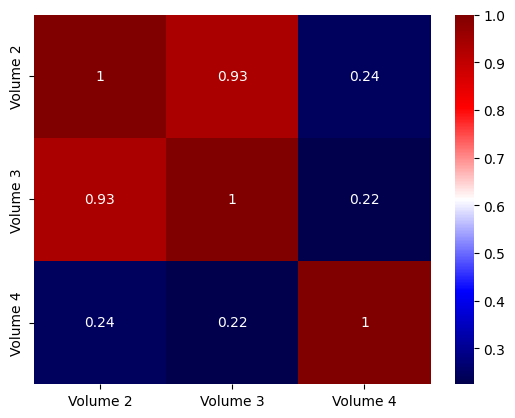

In [25]:
sns.heatmap(corr_matrix, cmap="seismic", annot=True) #vmin=-1, vmax=1
plt.show()
#me creo un mapa de calor para ver las relaciones entre las variables
#entre volumen 2 y 3 la correlación es alta, como vimos antes.
#Entre vol 3 y 4 la corr es bajísima. Siendo que es Volumen 4 es la continuación del tres en cuanto a volumen de ventas, pareciera que que va en decrecimiento.


Ahora  vamos a sacar promedios para esos volúmenes

In [26]:
# Promedio de Volume 2 por país
volume2_country = bayer_df.groupby('Marketed Countries (Page Three)')['Volume 2'].mean()

# Promedio de Volume 2 por producto
volume2_product = bayer_df.groupby('Material Description (Name)')['Volume 2'].mean()


In [27]:
volume2_country

Marketed Countries (Page Three)
Antigua and Barbuda [AG];Aruba [AW];Bahamas [BS];Barbados [BB];Cayman Islands [KY];Curaçao [CW];Jamaica [JM];Sint Maarten [SX];Trinidad and Tobago [TT]       9.000000
Argentina [AR]                                                                                                                                              431.859649
Argentina [AR];Bolivia [BO];Paraguay [PY]                                                                                                                   677.000000
Argentina [AR];Paraguay [PY]                                                                                                                                352.500000
Argentina [AR];Uruguay [UY]                                                                                                                                4074.000000
                                                                                                                                     

In [28]:
volume2_product

Material Description (Name)
ACID MANTLE  LOCION X120ML CO               163.0
ACID MANTLE CREMA X60 GR CO                  27.0
ACID MANTLE LOCION X400ML CO                 16.0
ACID MANTLE SOAP X90GR N.I. CO              304.0
ACID MANTLE X120ML x 2 UND P.ESPECIAL CO    111.0
                                            ...  
Tabcin Pods Night CAPS BLI 12 CEA            69.0
Tabcin Pods Night CAPS BLI 60 CEA           132.0
Tabcin Pods Noche CAPS BLI 4 MX               0.0
Tabcin Pods Phlegm&Cong CAPS  BLI 12 CEA      0.0
Tabcin Pods Phlegm&Cong CAPS BLI 60 CEA       0.0
Name: Volume 2, Length: 641, dtype: float64

In [29]:
# Promedio de Volume 4 por país
volume4_country = bayer_df.groupby('Marketed Countries (Page Three)')['Volume 2'].mean()

# Promedio de Volume 4 por producto
volume4_product = bayer_df.groupby('Material Description (Name)')['Volume 2'].mean()


In [30]:
volume4_country


Marketed Countries (Page Three)
Antigua and Barbuda [AG];Aruba [AW];Bahamas [BS];Barbados [BB];Cayman Islands [KY];Curaçao [CW];Jamaica [JM];Sint Maarten [SX];Trinidad and Tobago [TT]       9.000000
Argentina [AR]                                                                                                                                              431.859649
Argentina [AR];Bolivia [BO];Paraguay [PY]                                                                                                                   677.000000
Argentina [AR];Paraguay [PY]                                                                                                                                352.500000
Argentina [AR];Uruguay [UY]                                                                                                                                4074.000000
                                                                                                                                     

In [31]:
volume4_product

Material Description (Name)
ACID MANTLE  LOCION X120ML CO               163.0
ACID MANTLE CREMA X60 GR CO                  27.0
ACID MANTLE LOCION X400ML CO                 16.0
ACID MANTLE SOAP X90GR N.I. CO              304.0
ACID MANTLE X120ML x 2 UND P.ESPECIAL CO    111.0
                                            ...  
Tabcin Pods Night CAPS BLI 12 CEA            69.0
Tabcin Pods Night CAPS BLI 60 CEA           132.0
Tabcin Pods Noche CAPS BLI 4 MX               0.0
Tabcin Pods Phlegm&Cong CAPS  BLI 12 CEA      0.0
Tabcin Pods Phlegm&Cong CAPS BLI 60 CEA       0.0
Name: Volume 2, Length: 641, dtype: float64

In [32]:
# Promedio de Volume 3por país
volume3_country = bayer_df.groupby('Marketed Countries (Page Three)')['Volume 2'].mean()

# Promedio de Volume 3 por producto
volume3_product = bayer_df.groupby('Material Description (Name)')['Volume 2'].mean()


In [33]:
volume3_country

Marketed Countries (Page Three)
Antigua and Barbuda [AG];Aruba [AW];Bahamas [BS];Barbados [BB];Cayman Islands [KY];Curaçao [CW];Jamaica [JM];Sint Maarten [SX];Trinidad and Tobago [TT]       9.000000
Argentina [AR]                                                                                                                                              431.859649
Argentina [AR];Bolivia [BO];Paraguay [PY]                                                                                                                   677.000000
Argentina [AR];Paraguay [PY]                                                                                                                                352.500000
Argentina [AR];Uruguay [UY]                                                                                                                                4074.000000
                                                                                                                                     

In [34]:
volume3_product

Material Description (Name)
ACID MANTLE  LOCION X120ML CO               163.0
ACID MANTLE CREMA X60 GR CO                  27.0
ACID MANTLE LOCION X400ML CO                 16.0
ACID MANTLE SOAP X90GR N.I. CO              304.0
ACID MANTLE X120ML x 2 UND P.ESPECIAL CO    111.0
                                            ...  
Tabcin Pods Night CAPS BLI 12 CEA            69.0
Tabcin Pods Night CAPS BLI 60 CEA           132.0
Tabcin Pods Noche CAPS BLI 4 MX               0.0
Tabcin Pods Phlegm&Cong CAPS  BLI 12 CEA      0.0
Tabcin Pods Phlegm&Cong CAPS BLI 60 CEA       0.0
Name: Volume 2, Length: 641, dtype: float64

# Ahora cvamosa traernos ese dataframe 'countries', que contiene valores binariospara saber si unproducto tiene presencia en un país. 

In [35]:
countries.head()

,Antigua and Barbuda [AG],Argentina [AR],Aruba [AW],Bahamas [BS],Barbados [BB],Belize [BZ],Bermuda [BM],Bolivia [BO],Brazil [BR],Cayman Islands [KY],...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
#oncateno los DataFrames a lo largo de las columnas (ejes)
bayer_df_countries = pd.concat([bayer_df, countries], axis=1)

In [37]:
countries['Suriname [SR]'].describe()

count    657.000000
mean       0.007610
std        0.086971
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Suriname [SR], dtype: float64

In [38]:
#vamos a fusilar a Suriname, pero antes, let's see cuántos productos dan true en su columna
products_in_suriname = bayer_df_countries[bayer_df_countries["Suriname [SR]"] == 1]
products_in_suriname

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
410,87481166,Natele Stage 2 DHA CAPS BLI 28 CEA,1614566,Nutritionals,El Salvador [SV];Barbados [BB];Dom. Rep.[DO];B...,Centro / Caribe,LATAM,Blister,28.0,Piece [PCE],...,1,1,0,0,1,1,1,1,0,0
530,88406176,Redoxon Infantil 100mg TACH BT 100 CEA,1600038,Nutritionals,El Salvador [SV];Barbados [BB];Dom. Rep.[DO];B...,Centro / Caribe,LATAM,Bottle,100.0,Piece [PCE],...,1,0,0,0,1,1,1,1,0,0
531,88406176,Redoxon Infantil 100mg TACH BT 100 CEA,1600037,Nutritionals,El Salvador [SV];Barbados [BB];Dom. Rep.[DO];B...,Centro / Caribe,LATAM,Bottle,100.0,Piece [PCE],...,1,0,0,0,1,1,1,1,0,0
532,88406176,Redoxon Infantil 100mg TACH BT 100 CEA,1600036,Nutritionals,El Salvador [SV];Barbados [BB];Dom. Rep.[DO];B...,Centro / Caribe,LATAM,Bottle,100.0,Piece [PCE],...,1,0,0,0,1,1,1,1,0,0
641,88825705,Canesten Vaginal 200mg CAPS BLI 3 CEA,1601243,Dermatology,Bahamas [BS];Barbados [BB];Belize [BZ];Costa R...,Centro / Caribe,LATAM,Blister,3.0,Piece [PCE],...,1,1,0,0,0,0,1,1,0,0


## Comento los .drop() para no ejecutarla demás y que me de error por pretender borrar lo _ya_ borrado


In [39]:
#ahora sí que sí
#bye bye [SR]
#bayer_df_countries.drop(columns=['Suriname [SR]'], inplace=True)
bayer_df_countries.head(2)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,0,0,0,0,0,0,1,0
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,1,0,0,0,0,0,0,0


In [40]:
product_column = bayer_df["UI Description"]
product_column

0      REDOXON Orange 1000 mg Effervescent Tablet
1             REDOXON 2000 mg Effervescent Tablet
2          BEROCCA Ca & Mg, Zn Film-coated Tablet
3              SUPRADYN 3 RDA Sugar-coated Tablet
4              SUPRADYN 3 RDA Sugar-coated Tablet
                          ...                    
652                     FOCUS 500 mg Plain tablet
653                        BEPANTHEN 5 % Ointment
654                           BEPANTHEN 5 % Cream
655                 TALCID 500 mg Chewable Tablet
656                                BEPANTHOL Wipe
Name: UI Description, Length: 657, dtype: object

In [41]:
bayer_df.head(1)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Primary Pack Type (Page Three).1,FG Pack Size (Page Three).1,FG Pack Size UoM (Page Three).1,Low performer,Galenical form.1
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,REDOXON Orange 1000 mg Effervescent Tablet,Solid|Tablet|Effervescent,85.0,164.0,197.0,Tube Rigid,10.0,Piece [PCE],NaN,Solid|Tablet|Effervescent


In [42]:
bayer_df_countries.head(1)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,0,0,0,0,0,0,1,0


countries.columns

In [43]:
countries.columns

Index(['Antigua and Barbuda [AG]', 'Argentina [AR]', 'Aruba [AW]',
       'Bahamas [BS]', 'Barbados [BB]', 'Belize [BZ]', 'Bermuda [BM]',
       'Bolivia [BO]', 'Brazil [BR]', 'Cayman Islands [KY]', 'Chile [CL]',
       'Colombia [CO]', 'Costa Rica [CR]', 'Curaçao [CW]', 'Dom. Rep.[DO]',
       'Dominica [DM]', 'Ecuador [EC]', 'El Salvador [SV]', 'Guatemala [GT]',
       'Guyana [GY]', 'Haiti [HT]', 'Honduras [HN]', 'Hong Kong [HK]',
       'Jamaica [JM]', 'Mexico [MX]', 'Netherlands Antilles [AN]',
       'Nicaragua [NI]', 'Panama [PA]', 'Paraguay [PY]', 'Peru [PE]',
       'Saint Lucia [LC]', 'Sint Maarten [SX]', 'Suriname [SR]',
       'Trinidad and Tobago [TT]', 'Uruguay [UY]', 'Venezuela [VE]'],
      dtype='object')

# Ahora quiero saber cuáles son los países que tienen más valores true 
# Es decir, los países en donde vayer comercializa más productos.
# Suma de valores verdaderos (1) en cada columna para cada país:

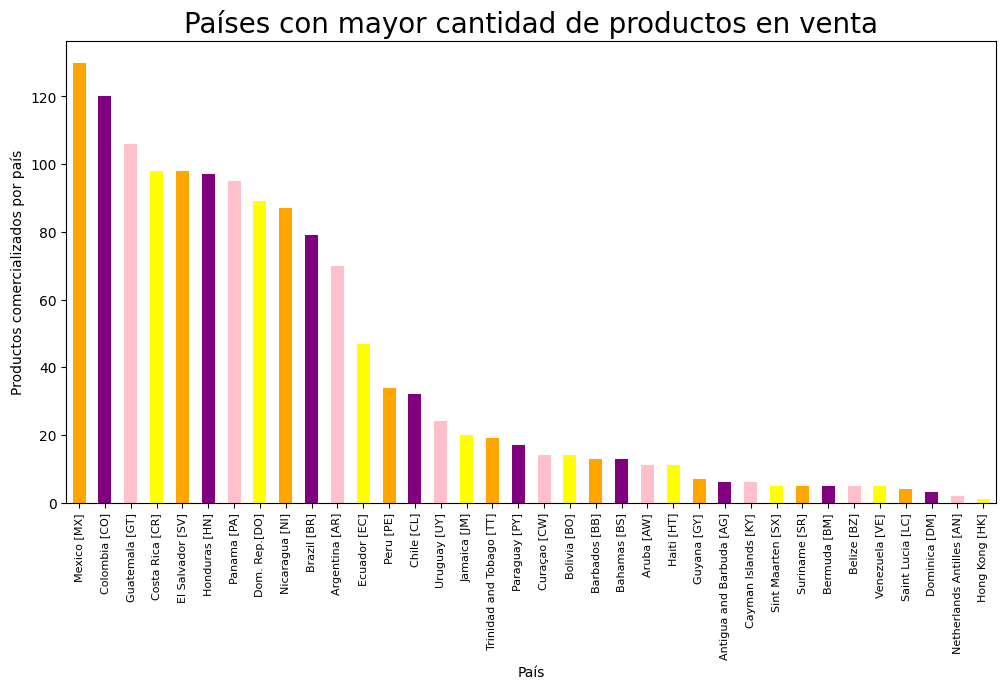

In [44]:

countries_sum = countries.sum()
#colores = ['orange','red','pink', 'light pink', 'yellow', 'light yellow', 'light green', 'light blue']
#no such thing as dark blue or light pink.
colores = ['orange', 'purple', 'pink','yellow'] #vaya, hice la bandera del orgullo jaja
# Ordenar los países por la cantidad de valores verdaderos
countries_sum_sorted = countries_sum.sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
countries_sum_sorted.plot(kind='bar', color= colores)
plt.title('Países con mayor cantidad de productos en venta', fontsize=20)
plt.xlabel('País')
plt.ylabel('Productos comercializados por país')
plt.xticks( fontsize=8)
plt.show()


/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_80435/1739185172.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries_sum_sorted.index, y=countries_sum_sorted.values, palette=custom_colors)
/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_80435/1739185172.py:13: UserWarning: 
The palette list has fewer values (2) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=countries_sum_sorted.index, y=countries_sum_sorted.values, palette=custom_colors)


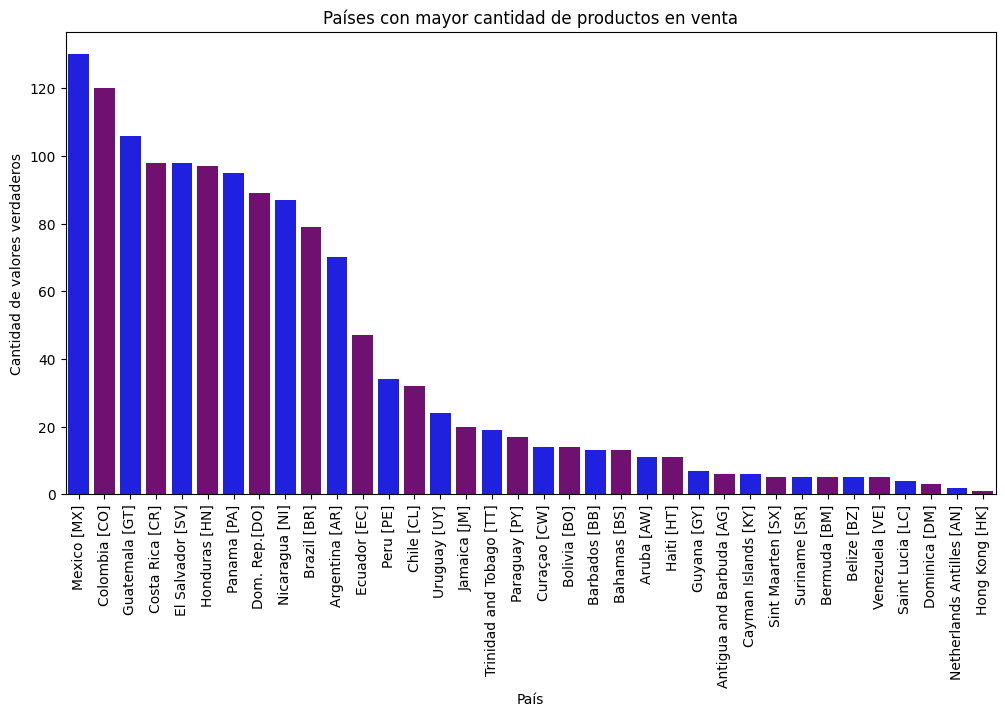

In [45]:
# Ahora con Seaborn
# Suma de valores verdaderos (1) en cada columna para cada país
countries_sum = countries.sum()

# Ordenar los países por la cantidad de valores verdaderos
countries_sum_sorted = countries_sum.sort_values(ascending=False)

# Colores personalizados
custom_colors = ['blue', 'purple']  # Agrega más colores si es necesario

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=countries_sum_sorted.index, y=countries_sum_sorted.values, palette=custom_colors)
plt.title('Países con mayor cantidad de productos en venta')
plt.xlabel('País')
plt.ylabel('Cantidad de valores verdaderos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


# Ahora, nos quedamos con los paises en los que, sumados, se superen los 20 productos en venta

/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_80435/743707524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries_filtered.index, y=countries_filtered.values, palette=custom_colors_new)
/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_80435/743707524.py:14: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=countries_filtered.index, y=countries_filtered.values, palette=custom_colors_new)


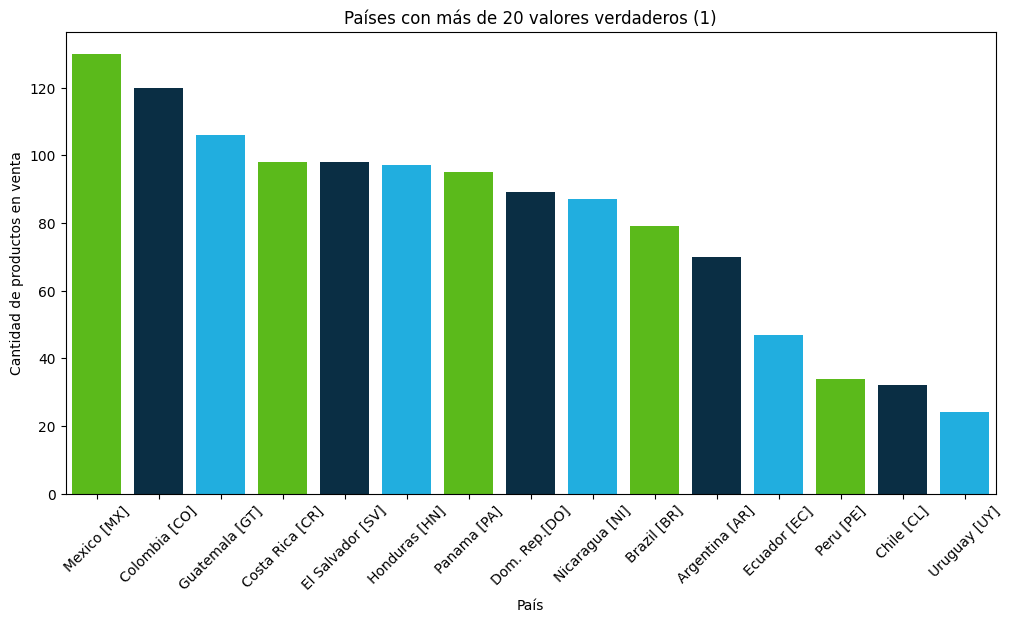

In [46]:

# Suma de valores verdaderos (1) en cada columna para cada país
countries_sum = countries.sum()

#Ordeno los países por la cantidad de valores true
countries_sum_sorted = countries_sum.sort_values(ascending=False)

#Filtro para quedarme con los países que tienen más de 20 valores verdaderos
countries_filtered = countries_sum_sorted[countries_sum_sorted > 20]
# Agrego los colores oficiales de la marca
custom_colors_new = ['#56D500', '#00314E', '#01BEFF']  

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=countries_filtered.index, y=countries_filtered.values, palette=custom_colors_new)
plt.title('Países con más de 20 valores verdaderos (1)')
plt.xlabel('País')
plt.ylabel('Cantidad de productos en venta')
plt.xticks(rotation=45) 
plt.show()


Y así podemos confirmar que la presencia más fuerte de Bayer está en México, Colombia y Guatemala:

In [47]:
countries_filtered.describe
# Estos son los países con los que trabajaremos en adelante.

<bound method NDFrame.describe of Mexico [MX]         130
Colombia [CO]       120
Guatemala [GT]      106
Costa Rica [CR]      98
El Salvador [SV]     98
Honduras [HN]        97
Panama [PA]          95
Dom. Rep.[DO]        89
Nicaragua [NI]       87
Brazil [BR]          79
Argentina [AR]       70
Ecuador [EC]         47
Peru [PE]            34
Chile [CL]           32
Uruguay [UY]         24
dtype: int64>

In [48]:
# He tenido mogollón de errores, porque countries_filtered es una Serie 
# y debo convertirla a DF 
countries_filtered_df = countries_filtered.to_frame()
countries_filtered_df




,0
Mexico [MX],130
Colombia [CO],120
Guatemala [GT],106
Costa Rica [CR],98
El Salvador [SV],98
Honduras [HN],97
Panama [PA],95
Dom. Rep.[DO],89
Nicaragua [NI],87
Brazil [BR],79


In [49]:
# Obtenengo los nombres de los países de countries_filtered_df en una lista
selected_countries = countries_filtered_df.index.tolist()

# Renombrar las columnas de bayer_df para que coincidan con los nombres de los países
bayer_df.rename(columns=lambda x: x.split(' [')[0] if x in selected_countries else x, inplace=True)


In [50]:
selected_countries

['Mexico [MX]',
 'Colombia [CO]',
 'Guatemala [GT]',
 'Costa Rica [CR]',
 'El Salvador [SV]',
 'Honduras [HN]',
 'Panama [PA]',
 'Dom. Rep.[DO]',
 'Nicaragua [NI]',
 'Brazil [BR]',
 'Argentina [AR]',
 'Ecuador [EC]',
 'Peru [PE]',
 'Chile [CL]',
 'Uruguay [UY]']

In [51]:
countries_filtered_df # Esto no me sirve más que para ver cuantos productos hay en cada país,
# pero no puedo relacionar este df con por ejemplo bayer_df para lograrlos obj

,0
Mexico [MX],130
Colombia [CO],120
Guatemala [GT],106
Costa Rica [CR],98
El Salvador [SV],98
Honduras [HN],97
Panama [PA],95
Dom. Rep.[DO],89
Nicaragua [NI],87
Brazil [BR],79


In [52]:
bayer_df_countries.head()

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,0,0,0,0,0,0,1,0
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,1,0,0,0,0,0,0,0
2,10055778,BEROCCA PLUS laq x30 CL,1600119,Nutritionals,Chile [CL],Chile,LATAM,Blister,30.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0
3,10055863,SUPRADYN grag x30 CL,1600128,Nutritionals,Chile [CL],Chile,LATAM,Blister,30.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0
4,10055864,SUPRADYN grag x30 PE,1600128,Nutritionals,Peru [PE],Peru,LATAM,Blister,30.0,Piece [PCE],...,0,0,0,1,0,0,0,0,0,0


In [53]:
countries

,Antigua and Barbuda [AG],Argentina [AR],Aruba [AW],Bahamas [BS],Barbados [BB],Belize [BZ],Bermuda [BM],Bolivia [BO],Brazil [BR],Cayman Islands [KY],...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Una función para tomar un país como entrada y que devuelva una lista de los prod
def productos_por_pais(pais):
    # Encuentra las filas donde el país tiene valor 1
    productos = bayer_df_countries[bayer_df_countries[pais] == 1]
    # Obtiene la lista de productos
    lista_productos = productos.index.tolist()
    return lista_productos

# Uso de la función para México
productos_mexico = productos_por_pais('Mexico [MX]')
print(productos_mexico)


[6, 15, 26, 27, 31, 32, 34, 36, 40, 41, 46, 50, 63, 75, 86, 87, 89, 98, 100, 102, 107, 108, 109, 111, 113, 114, 118, 122, 123, 128, 130, 131, 137, 139, 148, 152, 156, 162, 170, 180, 183, 185, 187, 188, 189, 190, 192, 194, 195, 196, 206, 207, 208, 209, 216, 220, 222, 224, 227, 228, 229, 230, 231, 237, 242, 251, 264, 265, 267, 269, 270, 273, 274, 275, 286, 295, 307, 311, 314, 333, 334, 377, 390, 403, 404, 407, 408, 424, 427, 435, 460, 461, 462, 463, 464, 465, 473, 481, 489, 497, 498, 499, 502, 504, 510, 521, 538, 541, 542, 556, 557, 566, 592, 593, 598, 603, 604, 610, 615, 619, 620, 621, 622, 626, 632, 633, 634, 646, 648, 655]


In [55]:
#cogemos la lista con los index de productos y obtenemos los nombres correspondientes
productos_mexico = bayer_df.loc[productos_mexico, "Material Description (Name)"]
print(productos_mexico)


6          BPN OINT 5%/0 ALU TUBE COLL 30G MX
15        BPN OINT 5%/0 ALU TUBE COLL 100G MX
26                         ASPIRINA 0.5 G 40S
27                          CAFIASPIRINA 40´S
31                ASPIRINA EF 12'S NVA IMAGEN
                        ...                  
633          Tabcin Pods Active CAPS BLI 4 MX
634           Tabcin Pods Noche CAPS BLI 4 MX
646      Alka-Seltzer TAEF SACH 10+4 Promo MX
648              Citracal D Fem TABL BT 60 MX
655    Alka Hidrotalcite 500mg TACH BLI 50 MX
Name: Material Description (Name), Length: 130, dtype: object


# Vamos a crear ahora unos graficos por cada país. En este punto, decido que me centraré en los primeros 5 países con mayor presencia: 
# México, Colombia, Guatemala, Costa Rica y El Salvador

In [56]:
bayer_df_countries.head(2) 

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,0,0,0,0,0,0,1,0
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,1,0,0,0,0,0,0,0


In [57]:
bayer_df_countries.columns #algo hice mal con la concatenación y debo volver a hacerla, creo
#listo. solo tuve que volver al principio 

Index(['Number', 'Material Description (Name)',
       'Number (Relationships.Formulation.Title Block)',
       'SBU Category (Relationships.Formulation.Formulation Attributes)',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Region',
       'Primary Pack Type (Page Three)', 'FG Pack Size (Page Three)',
       'FG Pack Size UoM (Page Three)', 'Created on (Page Two)',
       'Year created', 'Repack', 'SBU Category', 'Brand', 'UI',
       'UI Description', 'Galenical form', 'Volume 4', 'Volume 3', 'Volume 2',
       'Primary Pack Type (Page Three).1', 'FG Pack Size (Page Three).1',
       'FG Pack Size UoM (Page Three).1', 'Low performer', 'Galenical form.1',
       'Antigua and Barbuda [AG]', 'Argentina [AR]', 'Aruba [AW]',
       'Bahamas [BS]', 'Barbados [BB]', 'Belize [BZ]', 'Bermuda [BM]',
       'Bolivia [BO]', 'Brazil [BR]', 'Cayman Islands [KY]', 'Chile [CL]',
       'Colombia [CO]', 'Costa Rica [CR]', 'Curaçao [CW]', 'Dom. Rep.[DO]',
       'Dominica [DM]', '

In [58]:
#ahora sí que sí. vamos a seleccionar todas las filas de bayer_df_countries donde la columna 'Mexico [MX]' tenga el valor 1, lo que debería representar los productos vendidos en México. 
mexico_data = bayer_df_countries[bayer_df_countries['Mexico [MX]'] == 1]
mexico_data.head()



,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
6,10060870,BPN OINT 5%/0 ALU TUBE COLL 30G MX,1600198,Dermatology,Mexico [MX],Mexico,LATAM,Tube Flexible,30.0,Gram [G],...,0,0,0,0,0,0,0,0,0,0
15,10060871,BPN OINT 5%/0 ALU TUBE COLL 100G MX,1600198,Dermatology,Mexico [MX],Mexico,LATAM,Tube Flexible,100.0,Gram [G],...,0,0,0,0,0,0,0,0,0,0
26,4443067,ASPIRINA 0.5 G 40S,1600005,Analgesics,Mexico [MX],Mexico,LATAM,Blister,40.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0
27,4443113,CAFIASPIRINA 40´S,1600136,Analgesics,Mexico [MX],Mexico,LATAM,Blister,40.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0
31,4443164,ASPIRINA EF 12'S NVA IMAGEN,1600139,Analgesics,Mexico [MX],Mexico,LATAM,Sachet,12.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Renombremos la columna "SBU Category blablabla" a "Category"
bayer_df = bayer_df.rename(columns={"SBU Category (Relationships.Formulation.Formulation Attributes)": "Category"})
bayer_df.head(1)


,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),Category,Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Primary Pack Type (Page Three).1,FG Pack Size (Page Three).1,FG Pack Size UoM (Page Three).1,Low performer,Galenical form.1
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,REDOXON Orange 1000 mg Effervescent Tablet,Solid|Tablet|Effervescent,85.0,164.0,197.0,Tube Rigid,10.0,Piece [PCE],NaN,Solid|Tablet|Effervescent


## Para visualizar, creamos un data frame nuevo a partir de nombre y categoria de la varoriginal

In [60]:

category_df = bayer_df[['Material Description (Name)', 'Category']]


In [61]:
category_df

,Material Description (Name),Category
0,REDOXON NA ef x10 BO/PY/UY,Nutritionals
1,REDOXON LI ef x10 AR/BO/PY,Nutritionals
2,BEROCCA PLUS laq x30 CL,Nutritionals
3,SUPRADYN grag x30 CL,Nutritionals
4,SUPRADYN grag x30 PE,Nutritionals
...,...,...
652,Paracetamol Bayer 500mg TABL BLI 400 AR,Analgesics
653,Bepanthol Derma Regenera OINT TUF 30g CL,Dermatology
654,Bepanthol Regeneradora CREA TUF 30g AR,Dermatology
655,Alka Hidrotalcite 500mg TACH BLI 50 MX,Digestive Health


In [62]:
import plotly.express as px
# Colores de la marca
bayer_colors = ['#56D500', '#00314E', '#01BEFF']
fig = px.bar(category_df, x='Category', title="Productos vendidos en México por categoría", color_discrete_sequence=bayer_colors)
fig.show()


In [63]:
bayer_df_countries['Mexico [MX]']

0      0
1      0
2      0
3      0
4      0
      ..
652    0
653    0
654    0
655    1
656    0
Name: Mexico [MX], Length: 657, dtype: int64

## Ahora,vamos a calcular el crecimiento de ventas de los productos comercializados en México, de los ultimos tres años, basándonos en las columnas de volumen de ventas ("Volume 2", "Volume 3" y "Voolume4"). Para simplificar, trabajaremos con los 5 productos que mas crecimiento han tenido 

In [64]:
bayer_df_countries.columns

Index(['Number', 'Material Description (Name)',
       'Number (Relationships.Formulation.Title Block)',
       'SBU Category (Relationships.Formulation.Formulation Attributes)',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Region',
       'Primary Pack Type (Page Three)', 'FG Pack Size (Page Three)',
       'FG Pack Size UoM (Page Three)', 'Created on (Page Two)',
       'Year created', 'Repack', 'SBU Category', 'Brand', 'UI',
       'UI Description', 'Galenical form', 'Volume 4', 'Volume 3', 'Volume 2',
       'Primary Pack Type (Page Three).1', 'FG Pack Size (Page Three).1',
       'FG Pack Size UoM (Page Three).1', 'Low performer', 'Galenical form.1',
       'Antigua and Barbuda [AG]', 'Argentina [AR]', 'Aruba [AW]',
       'Bahamas [BS]', 'Barbados [BB]', 'Belize [BZ]', 'Bermuda [BM]',
       'Bolivia [BO]', 'Brazil [BR]', 'Cayman Islands [KY]', 'Chile [CL]',
       'Colombia [CO]', 'Costa Rica [CR]', 'Curaçao [CW]', 'Dom. Rep.[DO]',
       'Dominica [DM]', '

In [65]:
countries_5 = bayer_df_countries

In [66]:
countries_5

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),SBU Category (Relationships.Formulation.Formulation Attributes),Marketed Countries (Page Three),Country lead cluster,Region,Primary Pack Type (Page Three),FG Pack Size (Page Three),FG Pack Size UoM (Page Three),...,Nicaragua [NI],Panama [PA],Paraguay [PY],Peru [PE],Saint Lucia [LC],Sint Maarten [SX],Suriname [SR],Trinidad and Tobago [TT],Uruguay [UY],Venezuela [VE]
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,0,0,0,0,0,0,1,0
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,LATAM,Tube Rigid,10.0,Piece [PCE],...,0,0,1,0,0,0,0,0,0,0
2,10055778,BEROCCA PLUS laq x30 CL,1600119,Nutritionals,Chile [CL],Chile,LATAM,Blister,30.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0
3,10055863,SUPRADYN grag x30 CL,1600128,Nutritionals,Chile [CL],Chile,LATAM,Blister,30.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0
4,10055864,SUPRADYN grag x30 PE,1600128,Nutritionals,Peru [PE],Peru,LATAM,Blister,30.0,Piece [PCE],...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,89154022,Paracetamol Bayer 500mg TABL BLI 400 AR,1614789,Analgesics,Argentina [AR],Argentina,LATAM,Blister,400.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0
653,89158060,Bepanthol Derma Regenera OINT TUF 30g CL,1600198,Dermatology,Chile [CL],Chile,LATAM,Tube Flexible,30.0,Gram [G],...,0,0,0,0,0,0,0,0,0,0
654,89425883,Bepanthol Regeneradora CREA TUF 30g AR,1600188,Dermatology,Argentina [AR],Argentina,LATAM,Tube Flexible,30.0,Gram [G],...,0,0,0,0,0,0,0,0,0,0
655,89266661,Alka Hidrotalcite 500mg TACH BLI 50 MX,1600175,Digestive Health,Mexico [MX],Mexico,LATAM,Blister,50.0,Piece [PCE],...,0,0,0,0,0,0,0,0,0,0


In [100]:
'''
countries_5.drop(columns=['Guyana [GY]', 'Haiti [HT]',
       'Honduras [HN]', 'Hong Kong [HK]', 'Jamaica [JM]', 'Netherlands Antilles [AN]', 'Nicaragua [NI]', 'Panama [PA]',
       'Paraguay [PY]', 'Peru [PE]', 'Saint Lucia [LC]', 'Sint Maarten [SX]',
       'Suriname [SR]', 'Trinidad and Tobago [TT]', 'Uruguay [UY]',
       'Venezuela [VE]', 'Antigua and Barbuda [AG]',
       'Argentina [AR]', 'Aruba [AW]', 'Bahamas [BS]', 'Barbados [BB]',
       'Belize [BZ]', 'Bermuda [BM]', 'Bolivia [BO]', 'Brazil [BR]',
       'Cayman Islands [KY]', 'Chile [CL]',], inplace=True)
'''

In [101]:
countries_5.columns

Index(['Number', 'Material Description (Name)',
       'Number (Relationships.Formulation.Title Block)', 'Category',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Region',
       'Primary Pack Type (Page Three)', 'FG Pack Size (Page Three)',
       'FG Pack Size UoM (Page Three)', 'Created on (Page Two)',
       'Year created', 'Repack', 'SBU Category', 'Brand', 'UI',
       'UI Description', 'Galenical form', 'Volume 4', 'Volume 3', 'Volume 2',
       'Primary Pack Type (Page Three).1', 'FG Pack Size (Page Three).1',
       'FG Pack Size UoM (Page Three).1', 'Low performer', 'Galenical form.1',
       'Colombia [CO]', 'Costa Rica [CR]', 'Curaçao [CW]', 'Dom. Rep.[DO]',
       'Dominica [DM]', 'Ecuador [EC]', 'El Salvador [SV]', 'Guatemala [GT]',
       'Mexico [MX]'],
      dtype='object')

In [102]:
#countries_5.drop(columns= ['Ecuador [EC]', 'Curaçao [CW]','Dom. Rep.[DO]', 'Dominica [DM]'], inplace=True)

In [103]:
#countries_5.drop(columns=['Primary Pack Type (Page Three)', 'FG Pack Size (Page Three)',
       #'FG Pack Size UoM (Page Three)', 'SBU Category','Primary Pack Type (Page Three).1', 'FG Pack Size (Page Three).1',
       #'FG Pack Size UoM (Page Three)'], inplace=True)

In [104]:
countries_5.head(2)

,Number,Material Description (Name),Number (Relationships.Formulation.Title Block),Category,Marketed Countries (Page Three),Country lead cluster,Region,Created on (Page Two),Year created,Repack,...,Volume 3,Volume 2,FG Pack Size UoM (Page Three).1,Low performer,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX]
0,10056107,REDOXON NA ef x10 BO/PY/UY,1600106,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,NaN,NaN,NO,...,164.0,197.0,Piece [PCE],NaN,Solid|Tablet|Effervescent,0,0,0,0,0
1,10056110,REDOXON LI ef x10 AR/BO/PY,1600105,Nutritionals,Argentina [AR];Bolivia [BO];Paraguay [PY],Argentina,LATAM,NaN,NaN,NO,...,246.0,251.0,Piece [PCE],NaN,Solid|Tablet|Effervescent,0,0,0,0,0


In [105]:
#countries_5.drop(columns=['Number (Relationships.Formulation.Title Block)'],inplace=True)
countries_5.head(1)

,Number,Material Description (Name),Category,Marketed Countries (Page Three),Country lead cluster,Region,Created on (Page Two),Year created,Repack,Brand,...,Volume 3,Volume 2,FG Pack Size UoM (Page Three).1,Low performer,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX]
0,10056107,REDOXON NA ef x10 BO/PY/UY,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,LATAM,NaN,NaN,NO,REDOXON,...,164.0,197.0,Piece [PCE],NaN,Solid|Tablet|Effervescent,0,0,0,0,0


In [106]:
countries_5.shape

(657, 24)

In [107]:
countries_5.columns

Index(['Number', 'Material Description (Name)', 'Category',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Region',
       'Created on (Page Two)', 'Year created', 'Repack', 'Brand', 'UI',
       'UI Description', 'Galenical form', 'Volume 4', 'Volume 3', 'Volume 2',
       'FG Pack Size UoM (Page Three).1', 'Low performer', 'Galenical form.1',
       'Colombia [CO]', 'Costa Rica [CR]', 'El Salvador [SV]',
       'Guatemala [GT]', 'Mexico [MX]'],
      dtype='object')

In [108]:
countries_5.drop(columns=['Region',
       'Created on (Page Two)', 'Year created', 'Repack', 'FG Pack Size UoM (Page Three).1', 'Low performer'],inplace=True)

In [109]:
countries_5.columns

Index(['Number', 'Material Description (Name)', 'Category',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Brand',
       'UI', 'UI Description', 'Galenical form', 'Volume 4', 'Volume 3',
       'Volume 2', 'Galenical form.1', 'Colombia [CO]', 'Costa Rica [CR]',
       'El Salvador [SV]', 'Guatemala [GT]', 'Mexico [MX]'],
      dtype='object')

## El primer objetivo específico que me he planteado **"Identificar productos líderes en cada país.**  vamos a analizar la frecuencia de ventas de productos en estos países durante los últimos tres años. Para lograr esto, podemos utilizar las columnas "Volume 2", "Volume 3" y "Volume 4" del DataFrame "countries_5", donde "Volume 2" representa las ventas más antiguas y "Volume 4" las más recientes. Al mismo tiempo, creo que respondo al segundo obj: **Analisis de productos en tendencia**.

    En la siguiente celda de código, creo mexico_data con los valores True de la col "Mexico" del df countries_5. Luego comparo los volumenes de venta y selecciono los productos con un mayor crecimiento con .nlargest()

In [110]:
# Filtramos los datos solo para los valores True en Méx
mexico_data = countries_5[countries_5['Mexico [MX]'] == 1]

#calculams el crecimiento de ventas en los últimos tres años comparando volume4 con volume 2
mexico_data['Crecimiento'] = mexico_data['Volume 4'] - mexico_data['Volume 2']

# Selecciona los 5 productos con el mayor crecimiento
top_products = mexico_data.nlargest(5, 'Crecimiento')

# Crea el gráfico de barras para visualizar los resultados
fig = px.bar(
    top_products,
    x='Material Description (Name)',
    y='Crecimiento',
    color='Material Description (Name)',
    color_discrete_sequence=['#56D500'],  # Utiliza el color personalizado
    title='Productos con Mayor Crecimiento en Ventas en México (últimos 3 años)',
)

# Muestra el gráfico
fig.show()


/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_80435/2383516453.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
mexico_data.columns

Index(['Number', 'Material Description (Name)', 'Category',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Brand',
       'UI', 'UI Description', 'Galenical form', 'Volume 4', 'Volume 3',
       'Volume 2', 'Galenical form.1', 'Colombia [CO]', 'Costa Rica [CR]',
       'El Salvador [SV]', 'Guatemala [GT]', 'Mexico [MX]', 'Crecimiento'],
      dtype='object')

In [112]:
countries_5 = countries_5.rename(columns={"SBU Category (Relationships.Formulation.Formulation Attributes)": "Category"})
countries_5.head(1)

,Number,Material Description (Name),Category,Marketed Countries (Page Three),Country lead cluster,Brand,UI,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX]
0,10056107,REDOXON NA ef x10 BO/PY/UY,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,REDOXON,1600106,REDOXON Orange 1000 mg Effervescent Tablet,Solid|Tablet|Effervescent,85.0,164.0,197.0,Solid|Tablet|Effervescent,0,0,0,0,0


In [113]:
countries_5.columns #No entiendo porque estoy perdiendo la columna "crecimiento"

Index(['Number', 'Material Description (Name)', 'Category',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Brand',
       'UI', 'UI Description', 'Galenical form', 'Volume 4', 'Volume 3',
       'Volume 2', 'Galenical form.1', 'Colombia [CO]', 'Costa Rica [CR]',
       'El Salvador [SV]', 'Guatemala [GT]', 'Mexico [MX]'],
      dtype='object')

## Para el tercer objetivo específico, **Segmentación de productos por categoría o marca**, quiero la distribución de categorías de productos y la frecuencia de ventas en México. 
    
## En "Category" se encuentran los nombres de las categorías y en "Count" la cantidad de productos en cada categoría.

## Usamos px.pie para crear un gráfico de tarta. Le proporcionamos el DataFrame category_distribution y especificamos que "Category" se mapea a las etiquetas de las secciones del gráfico, y "Count" se mapea a los valores que representan la proporción de cada categoría.

### Configuramos los colores personalizados para las secciones de la tarta mediante el uso de fig.update_traces. Los colores principales son los colores de la marca.

    Hagamos una gráfica de categorías en general y otra particular de mexico

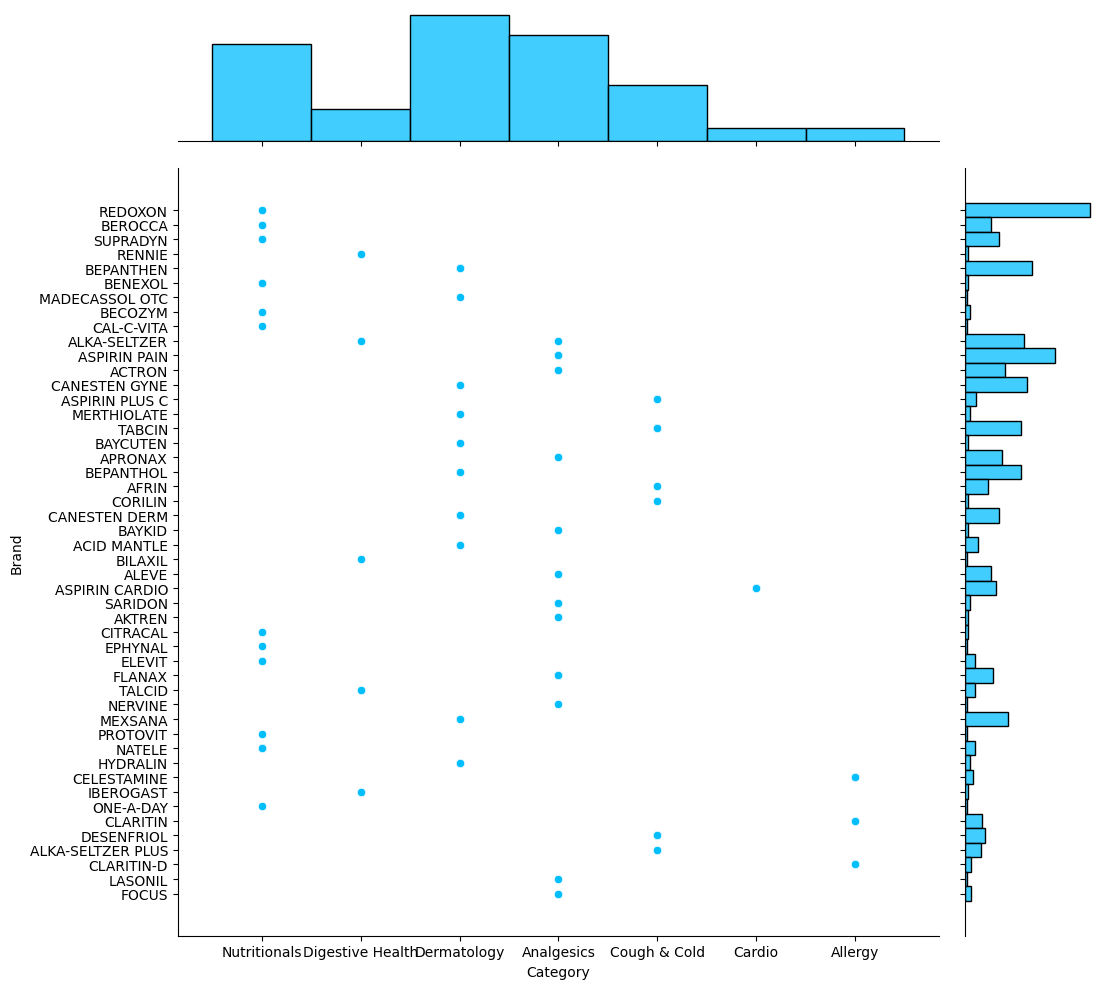

In [148]:
sns.jointplot(x=countries_5['Category'],
              y=countries_5['Brand'],
              color="#01BEFF",
             height = 10);

In [138]:
countries_5.head(1)

,Number,Material Description (Name),Category,Marketed Countries (Page Three),Country lead cluster,Brand,UI,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX]
0,10056107,REDOXON NA ef x10 BO/PY/UY,Nutritionals,Bolivia [BO];Uruguay [UY],Other Conosur,REDOXON,1600106,REDOXON Orange 1000 mg Effervescent Tablet,Solid|Tablet|Effervescent,85.0,164.0,197.0,Solid|Tablet|Effervescent,0,0,0,0,0


In [147]:
# Agrupa los datos por categoría y cuenta la cantidad de productos en cada una
category_counts = countries_5['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']  # Cambio el nombre del index

# Crea un gráfico de pastel
fig = px.pie(category_counts, names='Category', values='Count', title='Distribución de Productos por Categoría')

# Define los colores personalizados
colors = ['#56D500', '#00314E', '#01BEFF']
fig.update_traces(marker=dict(colors=colors))

# Muestra el gráfico
fig.show()

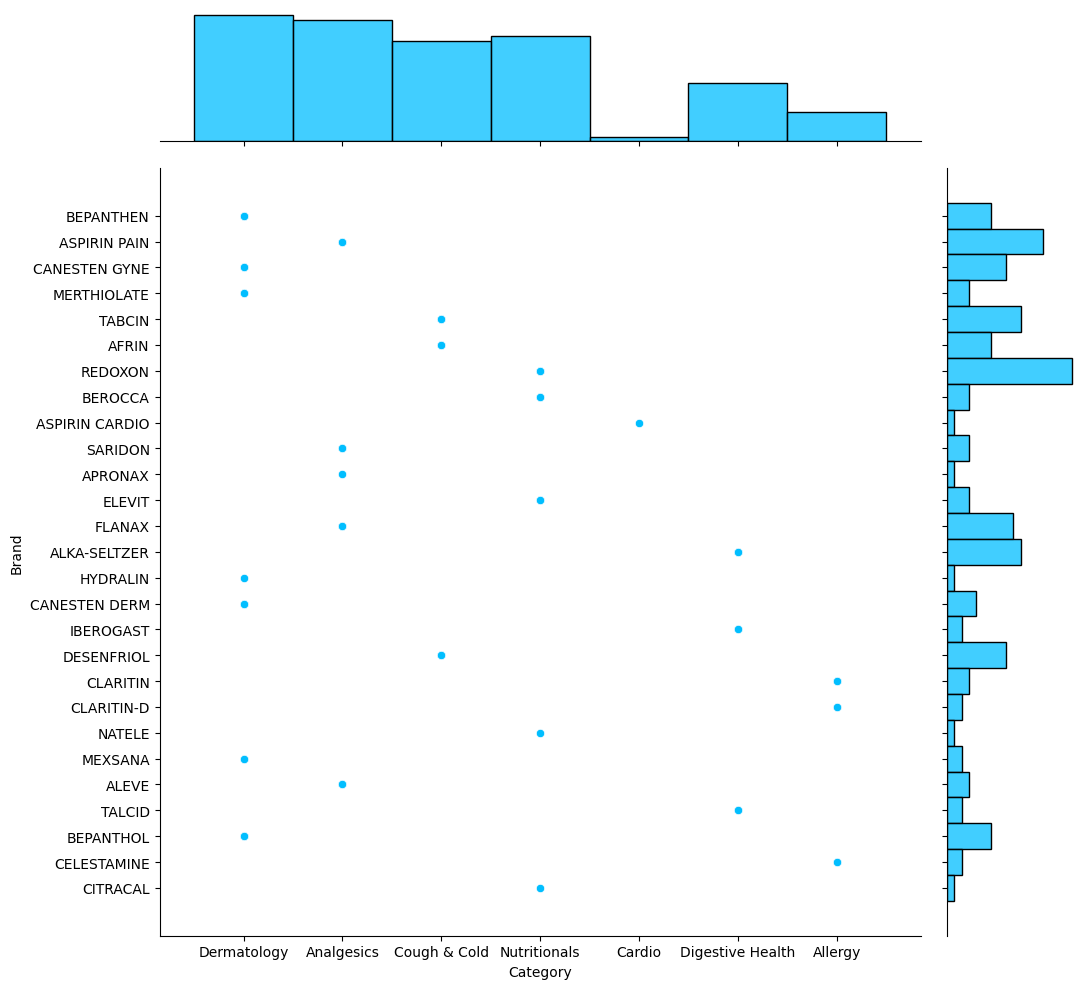

In [149]:
sns.jointplot(x=mexico_data['Category'],
              y=mexico_data['Brand'],
              color="#01BEFF",
             height = 10);

In [114]:
# Vamos a verlo de otra forma.
# Denuevo filtramos los datos para México
mexico_data = countries_5[countries_5['Mexico [MX]'] == 1]

# Agrupa los datos por categoría y cuenta la cantidad de productos en cada una
mex_category_counts = mexico_data['Category'].value_counts().reset_index()
mex_category_counts.columns = ['Category', 'Count']  # Cambio el nombre del index

# Crea un gráfico de pastel
fig = px.pie(mex_category_counts, names='Category', values='Count', title='Distribución de Productos por Categoría en México')

# Define los colores personalizados
colors = ['#56D500', '#00314E', '#01BEFF']
fig.update_traces(marker=dict(colors=colors))

# Muestra el gráfico
fig.show()


## Ahora vamos a centrarnos en los diez productos con mayor crecimiento en su volumen de venta en los últimos 3 años.
    Treaemos de regreso a mexico_data

In [115]:
mexico_data.columns

Index(['Number', 'Material Description (Name)', 'Category',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Brand',
       'UI', 'UI Description', 'Galenical form', 'Volume 4', 'Volume 3',
       'Volume 2', 'Galenical form.1', 'Colombia [CO]', 'Costa Rica [CR]',
       'El Salvador [SV]', 'Guatemala [GT]', 'Mexico [MX]'],
      dtype='object')

In [116]:
# Seleccionamos los diez productos con el mayor crecimiento con 10 como parametro de .nlargest()
top_10_growth_products = mexico_data.nlargest(10, 'Crecimiento')
top_10_growth_products[['Material Description (Name)', 'Volume 2', 'Volume 4', 'Crecimiento']]



KeyError: 'Crecimiento'

    Y creamos otra gráfica :)

In [ ]:
bayer_colors

['#56D500', '#00314E', '#01BEFF']

In [82]:
fig = px.bar(top_10_growth_products, x='Material Description (Name)', y='Crecimiento', 
             title='Top 10 Productos con Mayor Crecimiento en Ventas en México',
             labels={'Crecimiento': 'Aumento del Volumen de Ventas'},
             color_discrete_sequence=['#00314E'])

fig.show()

NameError: name 'top_10_growth_products' is not defined

## Echemos otro vistazo a las categorías. Esta vez, con los diez productos que seleccionamos ahora

In [125]:
mexico_data.head()

,Number,Material Description (Name),Category,Marketed Countries (Page Three),Country lead cluster,Brand,UI,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX]
6,10060870,BPN OINT 5%/0 ALU TUBE COLL 30G MX,Dermatology,Mexico [MX],Mexico,BEPANTHEN,1600198,BEPANTHEN 5 % Ointment,Semi-solid|Ointment,2093.0,2232.0,2329.0,Semi-solid|Ointment,0,0,0,0,1
15,10060871,BPN OINT 5%/0 ALU TUBE COLL 100G MX,Dermatology,Mexico [MX],Mexico,BEPANTHEN,1600198,BEPANTHEN 5 % Ointment,Semi-solid|Ointment,1300.0,1628.0,1414.0,Semi-solid|Ointment,0,0,0,0,1
26,4443067,ASPIRINA 0.5 G 40S,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600005,ASPIRIN PAIN 500 mg Plain Tablet,Solid|Tablet|Plain,4194.0,4694.0,5111.0,Solid|Tablet|Plain,0,0,0,0,1
27,4443113,CAFIASPIRINA 40´S,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600136,ASPIRIN PAIN Forte Plain Tablet,Solid|Tablet|Plain,3581.0,3469.0,3524.0,Solid|Tablet|Plain,0,0,0,0,1
31,4443164,ASPIRINA EF 12'S NVA IMAGEN,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600139,ASPIRIN PAIN 500 mg Effervescent Tablet,Solid|Tablet|Effervescent,1540.0,1525.0,1718.0,Solid|Tablet|Effervescent,0,0,0,0,1


In [126]:
mex_category_counts

,Category,Count
0,Dermatology,30
1,Analgesics,29
2,Nutritionals,25
3,Cough & Cold,24
4,Digestive Health,14
5,Allergy,7
6,Cardio,1


In [127]:
mexico_data.head()

,Number,Material Description (Name),Category,Marketed Countries (Page Three),Country lead cluster,Brand,UI,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX]
6,10060870,BPN OINT 5%/0 ALU TUBE COLL 30G MX,Dermatology,Mexico [MX],Mexico,BEPANTHEN,1600198,BEPANTHEN 5 % Ointment,Semi-solid|Ointment,2093.0,2232.0,2329.0,Semi-solid|Ointment,0,0,0,0,1
15,10060871,BPN OINT 5%/0 ALU TUBE COLL 100G MX,Dermatology,Mexico [MX],Mexico,BEPANTHEN,1600198,BEPANTHEN 5 % Ointment,Semi-solid|Ointment,1300.0,1628.0,1414.0,Semi-solid|Ointment,0,0,0,0,1
26,4443067,ASPIRINA 0.5 G 40S,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600005,ASPIRIN PAIN 500 mg Plain Tablet,Solid|Tablet|Plain,4194.0,4694.0,5111.0,Solid|Tablet|Plain,0,0,0,0,1
27,4443113,CAFIASPIRINA 40´S,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600136,ASPIRIN PAIN Forte Plain Tablet,Solid|Tablet|Plain,3581.0,3469.0,3524.0,Solid|Tablet|Plain,0,0,0,0,1
31,4443164,ASPIRINA EF 12'S NVA IMAGEN,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600139,ASPIRIN PAIN 500 mg Effervescent Tablet,Solid|Tablet|Effervescent,1540.0,1525.0,1718.0,Solid|Tablet|Effervescent,0,0,0,0,1


In [128]:
mexico_data['growth_percentage'] = ((mexico_data['Volume 4'] - mexico_data['Volume 2']) / mexico_data['Volume 2']) * 100
mexico_data['growth_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)


/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_80435/2175910313.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k1/r149v1_s4zd2tvc0m1c4cqcr0000gn/T/ipykernel_80435/2175910313.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
countries_5.columns

Index(['Number', 'Material Description (Name)', 'Category',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Brand',
       'UI', 'UI Description', 'Galenical form', 'Volume 4', 'Volume 3',
       'Volume 2', 'Galenical form.1', 'Colombia [CO]', 'Costa Rica [CR]',
       'El Salvador [SV]', 'Guatemala [GT]', 'Mexico [MX]',
       'growth_percentage'],
      dtype='object')

In [157]:
countries_5_top10 = countries_5.nlargest(15, 'growth_percentage')
countries_5_top10 = countries_5_top10.merge(countries_5[['Material Description (Name)', 'Category']], on='Material Description (Name)')
countries_5_top10.head()

,Number,Material Description (Name),Category_x,Marketed Countries (Page Three),Country lead cluster,Brand,UI,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX],growth_percentage,Category_y
0,85172158,ALKA SELTZER 100TAB EF MX,Digestive Health,Mexico [MX],Mexico,ALKA-SELTZER,1600001,ALKA SELTZER Effervescent Tablet,Solid|Tablet|Effervescent,101891.0,1111.0,1047.0,Solid|Tablet|Effervescent,0,0,0,0,1,9631.709647,Digestive Health
1,88725697,Aspirin 0.1g TABL BLI 100 CEA,Analgesics,Costa Rica [CR];Dom. Rep.[DO];El Salvador [SV]...,Centro / Caribe,ASPIRIN PAIN,1600030,ASPIRIN PAIN 100 mg Plain Tablet,Solid|Tablet|Plain,661.0,702.0,15.0,Solid|Tablet|Plain,0,1,1,1,0,4306.666667,Analgesics
2,81547327,FLANAX 550 MG 12 TABS,Analgesics,Mexico [MX],Mexico,FLANAX,1610521,FLANAX 550 mg Film-coated tablet (LAM),Solid|Tablet|Film-coated,99990.0,2613.0,3038.0,Solid|Tablet|Film-coated,0,0,0,0,1,3191.310072,Analgesics
3,86906236,CanGyn Combi 2% CREA 20g + 500mg VT 1 CO,Dermatology,Colombia [CO],Colombia,CANESTEN GYNE,1600012,CANESTEN GYNE 2 % Cream,Semi-solid|Cream,18.0,0.0,1.0,Semi-solid|Cream,1,0,0,0,0,1700.000000,Dermatology
4,88725689,Aspirina 0.1g TABL BLI 20 CEA,Analgesics,Venezuela [VE];Costa Rica [CR];Dom. Rep.[DO];E...,Centro / Caribe,ASPIRIN PAIN,1600030,ASPIRIN PAIN 100 mg Plain Tablet,Solid|Tablet|Plain,216.0,224.0,15.0,Solid|Tablet|Plain,0,1,1,1,0,1340.000000,Analgesics


In [161]:
figcat10 = px.bar(countries_5_top10, x='Category_x', y='growth_percentage', 
             title='Crecimiento porcentual de los 15 productos más vendidos en los principales países',
             labels={'Count': 'Cantidad de Productos'},
             color_discrete_sequence=['#01BEFF']) 
figcat10.update_xaxes(title_text='Categoría')
figcat10.update_yaxes(title_text='Crecimiento porcentual')
figcat10.show()

In [158]:

mextop_10_growth = mexico_data.nlargest(10, 'growth_percentage')

# esto combinamos los datos de los productos del Top 10 con las categorías
mextop_10_growth = mextop_10_growth.merge(mexico_data[['Material Description (Name)', 'Category']], on='Material Description (Name)')
mextop_10_growth.head(1)


,Number,Material Description (Name),Category_x,Marketed Countries (Page Three),Country lead cluster,Brand,UI,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX],growth_percentage,Category_y
0,85172158,ALKA SELTZER 100TAB EF MX,Digestive Health,Mexico [MX],Mexico,ALKA-SELTZER,1600001,ALKA SELTZER Effervescent Tablet,Solid|Tablet|Effervescent,101891.0,1111.0,1047.0,Solid|Tablet|Effervescent,0,0,0,0,1,9631.709647,Digestive Health


In [131]:
mextop_10_growth.columns

Index(['Number', 'Material Description (Name)', 'Category_x',
       'Marketed Countries (Page Three)', 'Country lead cluster', 'Brand',
       'UI', 'UI Description', 'Galenical form', 'Volume 4', 'Volume 3',
       'Volume 2', 'Galenical form.1', 'Colombia [CO]', 'Costa Rica [CR]',
       'El Salvador [SV]', 'Guatemala [GT]', 'Mexico [MX]',
       'growth_percentage', 'Category_y'],
      dtype='object')

In [132]:
print(mextop_10_growth['growth_percentage'])

0    9631.709647
1    3191.310072
2     648.000000
3     560.000000
4     338.235294
5     300.000000
6     295.238095
7     274.074074
8     196.212121
9     152.357320
Name: growth_percentage, dtype: float64


In [ ]:
bayer_colors

['#56D500', '#00314E', '#01BEFF']

In [150]:

figcat10 = px.bar(mextop_10_growth, x='Category_x', y='growth_percentage', 
             title='Distribución de Productos del Top 10 por Categoría en México',
             labels={'Count': 'Cantidad de Productos'},
             color_discrete_sequence=['#01BEFF']) 
figcat10.update_xaxes(title_text='Categoría')
figcat10.update_yaxes(title_text='Crecimiento porcentual')
figcat10.show()

In [121]:
mexico_data.head()

,Number,Material Description (Name),Category,Marketed Countries (Page Three),Country lead cluster,Brand,UI,UI Description,Galenical form,Volume 4,Volume 3,Volume 2,Galenical form.1,Colombia [CO],Costa Rica [CR],El Salvador [SV],Guatemala [GT],Mexico [MX]
6,10060870,BPN OINT 5%/0 ALU TUBE COLL 30G MX,Dermatology,Mexico [MX],Mexico,BEPANTHEN,1600198,BEPANTHEN 5 % Ointment,Semi-solid|Ointment,2093.0,2232.0,2329.0,Semi-solid|Ointment,0,0,0,0,1
15,10060871,BPN OINT 5%/0 ALU TUBE COLL 100G MX,Dermatology,Mexico [MX],Mexico,BEPANTHEN,1600198,BEPANTHEN 5 % Ointment,Semi-solid|Ointment,1300.0,1628.0,1414.0,Semi-solid|Ointment,0,0,0,0,1
26,4443067,ASPIRINA 0.5 G 40S,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600005,ASPIRIN PAIN 500 mg Plain Tablet,Solid|Tablet|Plain,4194.0,4694.0,5111.0,Solid|Tablet|Plain,0,0,0,0,1
27,4443113,CAFIASPIRINA 40´S,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600136,ASPIRIN PAIN Forte Plain Tablet,Solid|Tablet|Plain,3581.0,3469.0,3524.0,Solid|Tablet|Plain,0,0,0,0,1
31,4443164,ASPIRINA EF 12'S NVA IMAGEN,Analgesics,Mexico [MX],Mexico,ASPIRIN PAIN,1600139,ASPIRIN PAIN 500 mg Effervescent Tablet,Solid|Tablet|Effervescent,1540.0,1525.0,1718.0,Solid|Tablet|Effervescent,0,0,0,0,1


In [151]:
countries_5['growth_percentage'] = ((countries_5['Volume 4'] - countries_5['Volume 2']) / countries_5['Volume 2']) * 100
countries_5['growth_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [152]:
fig = px.bar(countries_5, x='Category', y='growth_percentage', 
             title='Crecimiento de Productos por Categoría ',
             labels={'Category_x': 'Categoría', 'growth_percentage': 'Crecimiento (%)'},
             color_discrete_sequence=bayer_colors)  

fig.show()



In [136]:
fig = px.bar(mextop_10_growth, x='Category_x', y='growth_percentage', 
             title='Crecimiento de Productos del Top 10 por Categoría en México',
             labels={'Category_x': 'Categoría', 'growth_percentage': 'Crecimiento (%)'},
             color_discrete_sequence=bayer_colors)  
fig.show()



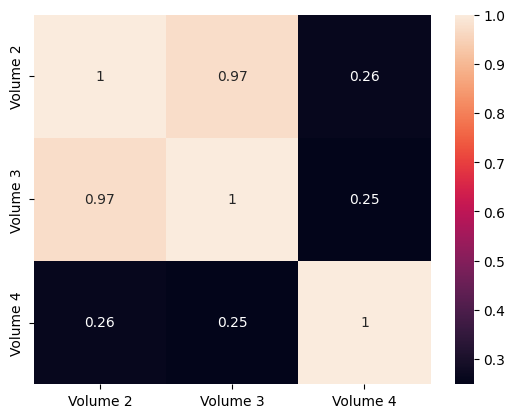

In [120]:
sns.heatmap(corr_matrix_mex, annot=True) #vmin=-1, vmax=1
plt.show() #darle la vuelta a esto que quiero ver. Creo que mejor me vendría el growth_perc con la categoría, por ejemplo